# Home Assignment 2 
## Advanced Econometrics
### Barbora Jakubová, Natálie Kolářová, Barbara Livorová 

> ## Problem 1: Bootstrap

Consider dataset city from the package boot. Data consists of random sample
of size $n = 10$ from the population of big cities in the US and each observation
corresponds to the number of inhabitants of a given city (in thousands) in year 1920
(variable u) and number of inhabitants of a given city in year 1930 (variable x).
Let $(U;X)$ be a random vector corresponding to the number of inhabitants in the
years 1920 and 1930, and $(u_i; x_i)$; $i = 1,....,10$, be our random sample.
Consider the following ratio
$$R=\frac{E(X)}{E(U)}$$

**a) Draw the dependence between $x_i$ and $u_i$ using the dataset.**

In [2]:
library(boot)
library(ggplot2)
data(city)

Warning message:
"package 'boot' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [3]:
str(city)
min(city$x)
min(city$u)
max(city$x)
max(city$u)

'data.frame':	10 obs. of  2 variables:
 $ u: num  138 93 61 179 48 37 29 23 30 2
 $ x: num  143 104 69 260 75 63 50 48 111 50


[1] 48

[1] 2

[1] 260

[1] 179

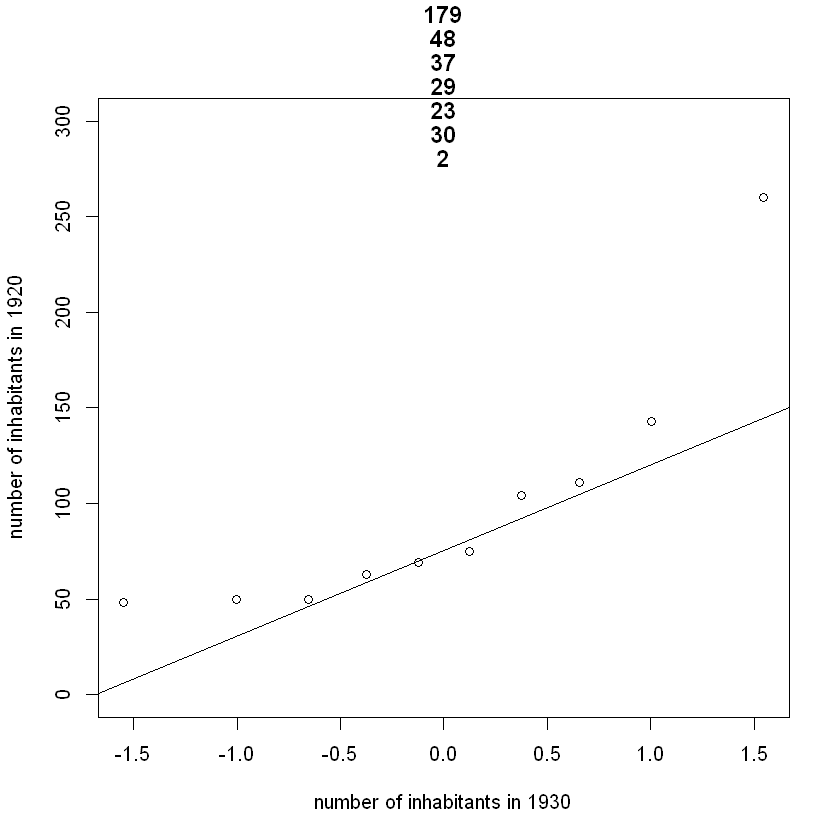

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


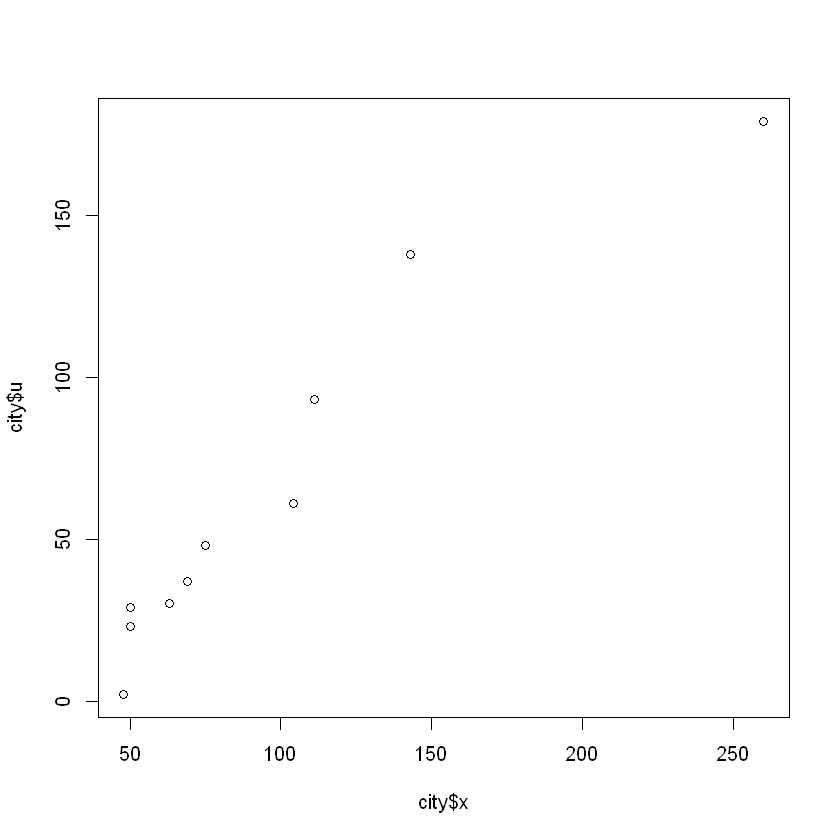

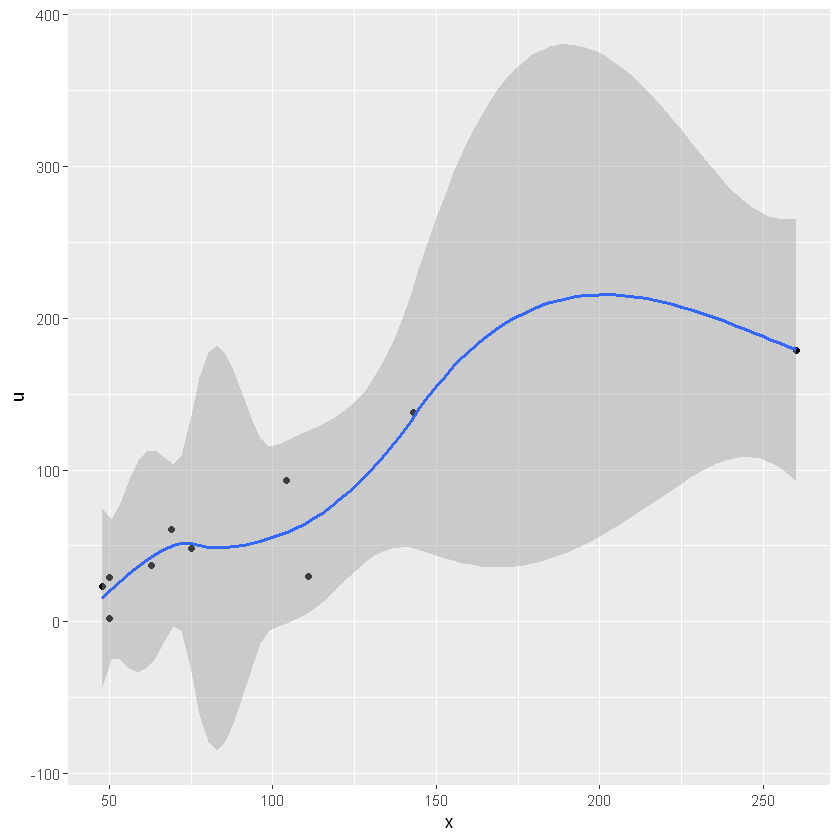

In [4]:
qqnorm(city$x, city$u, ylim = c(0, 300), plot.it = TRUE, xlab = "number of inhabitants in 1930", ylab = "number of inhabitants in 1920")
qqline(city, datax = FALSE)
qqplot(city$x, city$u)
ggplot(city, aes(x = x, y = u)) + geom_point() + geom_smooth()

**b) Estimate the value of $R$ from the random sample.**

In [16]:
R <- mean(city$x)/mean(city$u)
R

[1] 1.520312

**c) Compute the bootstrap standard error and the bootstrap bias of the estimate of
$R$. Use both ”brute force” bootstrapping and function boot from the respective
package.**

In [14]:
library(dplyr)
Boot    = 9999
boot.x = rep(0, Boot)
boot.u = rep(0, Boot)
set.seed(355)
for(i in 1:Boot) {
  sample_data <- sample_n(city, nrow(city), replace = TRUE)
  boot.x[i] <- mean(sample_data$x)
  boot.u[i] <- mean(sample_data$u)
}

In [17]:
R_bf <- boot.x/boot.u
sprintf("Bootstrap estimate of R: %.4f", mean(R_bf))
sprintf("bootstrap bias: %.4f", mean(R_bf) - R)
sprintf("Bootstrap s.e. for the mean: %.4f", sd(R_bf))

[1] "Bootstrap estimate of R: 1.5639"

[1] "bootstrap bias: 0.0436"

[1] "Bootstrap s.e. for the mean: 0.2264"

In [8]:
Boot2 = 999
R.boot = function(city, i) {
  R.out = mean(city$x[i])/mean(city$u[i])
  R.out
}


set.seed(355)
city.boot <- boot(city, statistic = R.boot, R = Boot2)
city.boot


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = city, statistic = R.boot, R = Boot2)


Bootstrap Statistics :
    original     bias    std. error
t1* 1.520312 0.03845757    0.208992

**d) Compute the 95\% confidence intervals using both percentile and normal approximation
method. Argue whether the normal approximation is valid in this case.**

In [18]:
sprintf("TThe 95-percent confidence interval using normal approximation method is between %.3f and %.3f",qnorm(0.025), qnorm(0.975))
tstats <- (R_bf - R)/sd(R_bf)
qs = quantile(tstats, probs = c(0.025,0.975))
sprintf("95%%-percent confidence interval using percentile approximation method fall between %.3f and %.3f",qs[[1]],qs[[2]])

[1] "TThe 95-percent confidence interval using normal approximation method is between -1.960 and 1.960"

[1] "95%-percent confidence interval using percentile approximation method fall between -1.184 and 2.565"

e) Test (without refinement) $H_0$ that $R = 1$ against the alternative $H_A : R\neq 1$. Calculate bootstrap t-statistic and compare it with critical values of the standard
normal distribution. Use also the percentile method for testing $H_0$ and compare
the results.

In [10]:
tstatsb <- (mean(R_bf) - 1)/sd(R_bf)
tstatsb

[1] 2.490752

Mimo normal, tedy reject null hypothesis; ale uvnitr pro percentile, tedy nemuzeme rejectnout H0

## Problem 2: Endogeneity

Let us follow the idea of the first exercise from Seminar 6 but for now we create
another artificial dataset containing 300 observations (note that although variance
of RVs is specified below, R commands often require to specify standard deviation
instead):
$$z_1 \sim N(2; 3^2),~ z_2 \sim N(2; 1.5^2),~ z_3 \sim N(0; 2^2),~ z4 \sim N(1.8; 2.5^2)$$
$$\epsilon_1 \sim N(0; 1.5^2),~ \epsilon_2 \sim N(0; 1.5^2),~ \epsilon_3\sim N(0; 1.5^2)$$
$$x_1 = 0.3 z_1 - z_2 + 0.9 z_4 + 0.75\epsilon_1$$
$$x_2 = 0.75z_2 + 0.75\epsilon_2$$
$$x_3 \sim N(0; 1)$$
$$y = 1 + 2.5x_1-x_2 + 0.45x_3 + \epsilon_3$$

On the dataset, we should estimate the following model:
$$y = const + \beta_1x_1 + \beta_3x_3 + \epsilon$$

**a) Discuss the nature of the endogeneity problem in the system above. You might
check important correlations and you should explain the difference between $x_1$
and $x_3$. Do you expect to observe any bias within the OLS estimation? Explain
why.**

In [11]:
rm(list=ls())

library(AER)
library(gmm)
library(systemfit)
library("ggpubr")

ERROR: Error in library(AER): there is no package called 'AER'


In [ ]:
# specify a variable to hold number of observations
nobs = 300

# create independent variables

set.seed(2020) # reset the random number generator

# generate the exogenous variables
z1 = rnorm(nobs,2,3) # specifing the mean and standard deviation
z2 = rnorm(nobs,2,1.5)
z3 = rnorm(nobs,0,2)
z4 = rnorm(nobs,1.8,2.5)

# generate the error
e1 = rnorm(nobs,0,1.5)
e2 = rnorm(nobs,0,1.5)
e3 = rnorm(nobs,0,1.5)

# create the endogenous variables
x1 = 0.3 * z1 - z2 + 0.9 * z4 + 0.75 * e1
x2 = 0.75 * z2 + 0.75 * e2
# create x3 exogenous
x3 = rnorm(nobs)

# create the dependent variable
y = 1 + 2.5 * x1 - x2 + 0.45 * x3 + e3

The endogeneity problem may be discussed based on the definition of the dataset given above in the instructions.
First of all (considering the whole dataset):
- x3 is exogenous variable (not correlated with the error term),
- x1 and x2 are endogenous variables,
- z1, z2, z3 and z4 are used as instruments (exogenous),
- x1 is dependent on (correlated with) z1, z2 and z4,
- x2 is correlated with z2.

Moreover, while the real population model says that the dependent variable y is explained by x1, x2 and x3; the model to estimate takes into account only x1 and x3.

The encountered problem arises by not including x2 into the regression. Variable x2 is correlated with z2, with which x1 is also correlated, and therefore it makes the variable x1 to be correlated with x2 and thus with the error term. The endogeneity would still not be an issue if the true coefficient of beta_2 was 0. However, from the true model we see that this is not the case. Therefore, we are facing the omission of the relevant variable issue, which causes the OLS estimates to be biased and inconsistent.

I.e. in other words, while x3 is exogenous variable which satisfies the assumption of not being correlated with the error term, x1 violates this assumption.

In [ ]:
cor.test(x1,x2)
cor.test(x3,x2)

The correlations above offer an evidence for our belief that x1 is correlated with x2 and thus it will be affected by not including x2 into regression. On the other hand, x3 is independent of x2.

**b) Estimate the model by OLS and interpret.**

In [ ]:
ols_fit = lm(y ~ x1 + x3)
summary(ols_fit)

We estimated the model by OLS and the results of the regression are provided above.

The Adjusted R^2 is 0.9361, which means that 93.61% of the total variability of y is explained by the model. This is quite high proportion, and thus quite suspicious.

All estimated coefficients are statistically significant even at 0.1% significance level. The estimated coefficient of x1 is 2.71 (the true parameter is 2.5) and the estimated coefficient of x3 is 0.40 (the true parameter is 0.45). Both estimates are quite close and the differences are not striking at the first sight.

On the other hand, the estimated intercept, while statistically significant, is estimated to be -0.66 compared to its true value of +1. It signals that the results are indeed probably biased.

???

**c) The data set includes some potential IV candidates: $z_1; z_2; z_3; z_4$. What assumptions need to be satisfied in order to have a ‘good’ instrument? Which of these
candidates seem to be ‘good’ instruments and why? Test their relevancy statistically.
Is there any invalid, irrelevant, or weak instrument?**

The instrument to be "good" must satisfy to main assumptions (besides several additional ones):
- relevance: the instrumental variable Z is correlated with X
- exogeneity (validity): the instrumental variable Z is uncorrelated with error term u.

Considering given instruments, z1 and z4 seem to be "good" instruments - as the variables and the model to estimate are defined, z1 and z4 are not correlated with the error term and, on the other hand, are correlated with X (specifically with x1). Instrument z2 is considered invalid as it fails to satisfy the assumption of exogeneity since the variable x2 is left in the error term and these are correlated. Finally, instrument z3 is seen as irrelevant since it is not correlated with X.

WEAK INSTRUMENT?

In [ ]:
cor.test(x1,z1)
cor.test(x1,z4)

Based on the correlations above, we may conclude that instruments z1 and z4 are indeed relevant as they are correlated with x1. For both of them it holds that the null hypothesis of correlation being equal to 0 is rejected. Moreover, note that the correlation between x1 and z4 is much higher than that between x1 and z1, 0.71 compared to 0.29 (it may be seen from the definition of variable x1 as well).

In [ ]:
cor.test(x1,z3)

On the other hand, we can see that the z3 is not correlated with x1 - the null hypothesis cannot be rejected. As above, we thus say that z3 is irrelevant.

**d) Based on section d), choose the best instrument and run the IV regression. Run
also 2SLS regression using all ‘good’ instruments. Compare coefficient estimates
and standard errors**

Given the correlation results from previous section, let's choose z4 as the best instrument. It satisfies the exogeneity assumption, it is relevant instrument and it has much stronger correlation with x1 compared to that between z1 and x1. First, we run IV regression using z4 as the only instrument (L=K: just-identified case).

In [ ]:
IV_fit = ivreg(y ~ x1 + x3 | x3 + z4)
summary(IV_fit)

Next, we run TSLS (=2SLS) regression, this time using all "good" instruments - i.e. both z4 and z1. 

Now, we can see that $[x_1]$ is _endogenous variable_ and $[x_3,z_1,z_4]$ are _exogenous variables_. Thus, we are in the situation when the number of instruments L=2 exceeds the number of endogenous variables K=1 (L>K: over-identified case, i.e. we have to use 2SLS estimator rather than IV estimator).

In [ ]:
TSLS_fit = ivreg(y ~ x1 + x3 | x3 + z1 + z4)
summary(TSLS_fit)

In [ ]:
compareBeta = cbind(c(1, 2.5, 0.45), summary(ols_fit)$coefficients[,1:2], summary(IV_fit)$coefficients[,1:2], summary(TSLS_fit)$coefficients[,1:2])
colnames(compareBeta)=c("True", "OLS","SE_OLS","IV","SE_IV","TSLS","SE_TSLS")
round(compareBeta,4)

In the table above, we can see all estimated coefficients from various models up to now. We added the true coefficients together with the OLS estimates for completeness. We can see that both models - the one estimated by IV method using only z4 and the one estimated by TSLS method using both z1 and z4 as instruments, yield quite similar coefficient estimates. Disregarding the estimate of the intercept, the coefficients are close to the true parameters (closer compared to the OLS estimates) - the estimates from TSLS are even little closer than those from IV. The standard errors from both IV and TSLS differ only slightly.

**e) Finally, test for the endogeneity using the Hausman test. Report and interpret
the results.**

We will test for endogeneity using the Hausman test (via hausman.systemfit() function). We will compare the OLS model and the TSLS model from previous section - i.e. using both z1 and z4 as instruments.

In [ ]:
data_end = data.frame(cbind(y, 1, x1, x2, x3, z1, z2, z3, z4)) # data should be in data.frame format
ols_model   = systemfit(y ~ x1 + x3, data = data_end, method = "OLS")
tsls_model    = systemfit(y ~ x1 + x3, data = data_end, method = "2SLS", inst = ~ x3 + z1 + z4)
hausman.systemfit(tsls_model, ols_model)

The Hausman test reveals that the OLS estimates are inconsistent and suggests we should choose TSLS which gives us consistent estimates. We reject the null hypothesis of exogeneity.

**f) Using extended dataset (simulate more data from the data generating process),
show that OLS is not consistent estimator of $\beta_1$ and $\beta_3$. Show that 2SLS provides
consistent results.**

In [ ]:
# specify a variable to hold number of observations
nobs = 100000

# create independent variables

set.seed(2020) # reset the random number generator

# generate the exogenous variables
z1 = rnorm(nobs,2,3) # specifing the mean and standard deviation
z2 = rnorm(nobs,2,1.5)
z3 = rnorm(nobs,0,2)
z4 = rnorm(nobs,1.8,2.5)

# generate the error
e1 = rnorm(nobs,0,1.5)
e2 = rnorm(nobs,0,1.5)
e3 = rnorm(nobs,0,1.5)

# create the endogenous variables
x1 = 0.3 * z1 - z2 + 0.9 * z4 + 0.75 * e1
x2 = 0.75 * z2 + 0.75 * e2
# create x3 exogenous
x3 = rnorm(nobs)

# create the dependent variable
y = 1 + 2.5 * x1 - x2 + 0.45 * x3 + e3

data_end_e = data.frame(cbind(y, 1, x1, x2, x3, z1, z2, z3, z4))

In [ ]:
ols_fit_e <- lm(y ~ x1 + x3,data=data_end_e)
summary(ols_fit_e)$coefficients

In [ ]:
TSLS_fit_e = ivreg(y ~ x1 + x3 | x3 + z1 + z4,data=data_end_e)
summary(TSLS_fit_e)$coefficients

In [ ]:
compareBeta2 = cbind(c(1, 2.5, 0.45), coef(ols_fit), coef(ols_fit_e), coef(TSLS_fit), coef(TSLS_fit_e))
colnames(compareBeta2)=c("True", "OLS (small n)", "OLS (large n)","TSLS (small n)","TSLS (large n)")
round(compareBeta2,4)

Consistency means that when n (number of observations) approaches infinity, the estimate of beta converges to its true value.

Mám to dobře vygenerované? Dimenze datasetů sedí (300 a 100000), ale...

## Problem 3: GMM

In the dataset *hw\_data.csv*, you have a time series which comes from Moving Average
process with $q$ lags - $MA(q)$ process. You will need libraries *gmm* and *tseries*
to answer the following questions. Note that if you do not answer correctly point a),
all consecutive questions will be wrong, hence no points can be earned.

In [ ]:
library(gmm)
library(tseries)

In [ ]:
data<-read.csv(file="hw2_data.csv")
head(data)
x<-ts(data$x)

a) How would you identify the lag $q$? What is the lag?

**What is the lag?**
Lagged dependent variable is such variable that is lagged in time. Considering time series and MA process it means that we are interested to what extend the dependent variable is explained by th value of the independent variable from previous periods.

In our opinion several approaches for **finding convenient number of lags $q$ exist**:

a) We can try to estimate MA with some number with lags and see how many of them have significant effect on dependent variable. Then we can add or substract some lags and reestimate the model.

b) using auto.arima from package $forecast$ which does the work for us. Auto.arima function is based on ....However, it uses MLE and its tools. 

c) Identifying number of lags using PACF and ACF functions. 

d) AIC, BIC criterions. 

In [ ]:
library(forecast)

In [ ]:
auto.arima(x)

Autoarima suggests that the convenient number of lags is two. 

In [ ]:
pacf(x) #to nepotřebujem..ten nám popisuje AR - z ecox 2 : decreasing rapidly
acf(x) #to potřebujem a někde psali že máme použít s signifikantních lagů;na našem grafu i lag0; z ecox 2: ro_k=0 if k>=q

The right number of lages are 2. The graph of autocorrelation function confirms the idea of auto.arima. Lag two is the last significant lag. Fro lags higher than two we cannot reject the null hypothesis that the autocorrelation function is equal to zero.
To conclude, the analysis reveal that we work with MA(2) process, that can be expressed as 

$$
\begin{aligned}
x_t=&\mu + \epsilon_t+\theta_1\epsilon_{t-1}+\theta_2\epsilon_{t-2}, \quad  t=1,\ldots,n \\
&\epsilon_t \sim iid(0,\sigma^2), \quad |\theta|<1 \\
&\boldsymbol{\delta_0}=(\mu,\theta_1,\theta_2,\sigma^2)'
\end{aligned} 
$$


b) Derive the moment conditions function for the process you identified previously
and write a corresponding function in R. Use more moment conditions than is
the number of coefficients that you want to estimate.

**Moment conditions for MA(2) process:**

Some of MA(2) population moments conditions we can use are:
$$
\begin{aligned}
E[x_t]&=\mu\\
E[x_t^2]&=\mu^2+\sigma^2(1+\theta_1^2+\theta_2^2)\\
E[x_tx_{t-1}]&=\mu^2+\sigma^2(\theta_1+\theta_1\theta_2)\\
E[x_tx_{t-2}]&=\mu^2+\sigma^2(\theta_2)\\
E[x_tx_{t-3}]&=\mu\\
E[x_{t-1}x_{t-2}]&=\mu^2+\sigma^2(\theta_1+\theta_1\theta_2)\\
\end{aligned}'
$$

In [ ]:
ma2.moments = function(parm, data = data) {
  # parm=(mu,theta1,theta2,sig2)'
  # data=(x(t),x(t)^2,x(t)*x(t-1),x(t)*x(t-2),x(t)*x(t-3)) is assumed to be a matrix
  # theoretical population moments:
  m1 = parm[1]
  m2 = parm[1]^2+parm[4]*(1+parm[2]^2+parm[3]^2)
  m3 = parm[1]^2+parm[4]*(parm[2]+parm[2]*parm[3])
  m4 = parm[1]^2+parm[4]*(parm[3])
  m5=parm[1]^2
  m6 =parm[1]^2+parm[4]*(parm[2]+parm[2]*parm[3])
  # moment conditions:
  t(t(data) - c(m1, m2, m3, m4, m5))
}



In [ ]:
len=length(x)
ma2.data=cbind(x[4:len],
               x[4:len]^2,
               x[4:len]*x[3:(len-1)],
               x[4:len]*x[2:(len-2)],
               x[4:len]*x[1:(len-3)])

c) Estimate the model using gmm and both identity and optimal weighting matrix.
Provide the output and interpret the coefficient significance and the $J-test$ statistics.

In [ ]:
start.vals          = c(0,0.9,0.4,1) # true values
names(start.vals)   = c("mu","theta1","theta2","sig2")
ma2.mom             = ma2.moments(parm = start.vals, data = ma2.data)

head(ma2.mom,n=10)

In [ ]:
ma2.gmm=gmm(g=ma2.moments,ma2.data,t0 = start.vals, wmatrix = "optimal",
optfct = "nlminb", vcov = "HAC", kernel = "Truncated")
summary(ma2.gmm)

## Problem 4: CAPM beta of Apple Inc.

You are going to estimate CAPM betas for Apple Inc. on two different time periods
and compare the results. Inference on the estimated parameters will be performed
using bootstrap.

CAPM beta for company $i$ can be estimated by regressing its returns on market
returns using simple OLS
$$r_t^i-r_t^f=\alpha_i+\beta_i(r_t^M-r_t^f)+\epsilon_t^i$$
$$r_t^{e,i}=\alpha_i+\beta_ir_t^{e,M}+\epsilon_t^i$$
where $r^i_t (r^{e,i}_t)$ is log (excess) return of company $i$, $r^M_t~ (r^{e,M}_t)$ is log (excess) market return, and $r^f_t$ is risk-free interest rate, all at time $t$.

**a) Download adjusted daily prices of Apple Inc. (ticker 'aapl') for year 2008
and 2017, separately. Download daily data for Nasdaq Composite Index (ticker
'^ixic'), which will be used as a proxy variable for market. Chicago Board
Options Exchange (CBOE) 10y interest rate T-note (ticker ’^tnx’) will be used
as a risk-free rate.**

In [ ]:
aaple_08<-read.csv("AAPL_08.csv")
aaple_17<-read.csv("AAPL_17.csv")
tnx_08<-read.csv("^TNX_08.csv")
tnx_17<-read.csv("^TNX_17.csv")
ixic_08<-read.csv("^IXIC_08.csv")
ixic_17<-read.csv("^IXIC_17.csv")

str(aaple_08)
str(aaple_17)
str(tnx_08)
str(tnx_17)
str(ixic_08)
str(ixic_17)

**b) Compute log-returns for all series.**

In [ ]:
str(aaple_08)
str(aaple_17)
str(tnx_08)
str(tnx_17)
str(ixic_08)
str(ixic_17)


In [ ]:
log_returns_08 <- diff(log(aaple_08$Adj.Close), lag=1)
log_returns_17 <- diff(log(aaple_17$Adj.Close), lag=1)
log_returns_M_08<-diff(log(ixic_08$Adj.Close), lag=1)
log_returns_M_17 <- diff(log(ixic_17$Adj.Close), lag=1)

**c) Draw histogram and kernel density approximation of Apple log returns. Compare
it with normal distribution with the same mean and standard deviation.
Does samples considerably deviate from normality? Which noticeable features
do you observe in the data? Perform this whole analysis on both time periods
separately.**

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 6)
par(mfcol = c(1,2)) 
hist(log_returns_08)
hist(log_returns_17)

options(repr.plot.width = 12, repr.plot.height = 6)
par(mfcol = c(1,2)) # create a subplot 1x2
hist(log_returns_08, prob = TRUE, breaks = 50, main = "Histogram") #xlim = c(-3 + mu.hat, mu.hat + 3))
lines(density(log_returns_08, kernel = "gaussian"), col = "red", lwd = 3) # kernel density approximation
curve(dnorm(x, mean = 0, sd = 1), col = "blue", lwd = 1, add = TRUE) # theoretical standard normal density
qqnorm(log_returns_08) # normal q-q plot
qqline(log_returns_08, datax = FALSE)

options(repr.plot.width = 12, repr.plot.height = 6)
par(mfcol = c(1,2)) # create a subplot 1x2
hist(log_returns_17, prob = TRUE, breaks = 50, main = "Histogram") #xlim = c(-3 + mu.hat, mu.hat + 3))
lines(density(log_returns_17, kernel = "gaussian"), col = "red", lwd = 3) # kernel density approximation
curve(dnorm(x, mean = 0, sd = 1), col = "blue", lwd = 1, add = TRUE) # theoretical standard normal density
qqnorm(log_returns_17) # normal q-q plot
qqline(log_returns_17, datax = FALSE)

In [ ]:
curve(dnorm(x, mean = 0, sd = 1), col = "blue", lwd = 1, add = TRUE)

**d) Compute CAPM beta for Apple using simple OLS on each time period separately.
Compare the obtained results.**

**e) Use the nonparametric bootstrap to compute bootstrap standard error of CAPM
beta estimate based on 1000 bootstrap replications and bootstrap sample size
equal to the size of the original sample. Use boot command. Perform this
whole analysis on both time periods separately.**

**f) Graphically compare histogram and kernel density approximation (use gaussian
kernel only) of the boot-based set of 1000 bootstrapped CAPM betas with normal
distribution. Compute 95\% percent confidence intervals for CAPM beta
for both time periods using percentile method and method based on normal
approximation. Which method is in this case probably more suitable. Based
on the estimated confidence intervals, do the estimates of CAPM beta significantly
differ over these 2 periods?**

**g) Another approach how to use bootstrap is instead of resampling the observations
is to resample the estimated residuals. Estimate CAPM beta by OLS,
save the estimated residuals, and perform bootstrap by resampling the residuals
and generating new values of dependent variables as**
$$r^{e*}_t = \alpha_i + \beta_ir^{e,M}_t + \epsilon_t^{i*},$$
**where $\epsilon_t^{i*}$ are resampled from empirical distribution function. In each bootstrap
replication, calculate values of dependent variable for all values of independent
variable. The rest of the procedure is the same as in the case of resampling the
observations. Perform this analysis on one time period of your choice. Compare
the results obtained from this approach and from the traditional approach from
above. Why this method may not be the optimal in this case?**